# Tutorial 4: Machine learning classification.

---

In this tutorial, we will use [random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) (RF) to classify between bruised `B` and sound `S` apples.

The input will use the best 10 features we made in tutorial3, for each of the four sets of engineered features. We are interested in finding out how 10 features with RF hold up against the baseline we made in Tutorial 2.

First, let us recall the data from the previous notebooks

In [1]:
# ___Cell no. 1___

%store -r Y
%store -r X_arrayRol 
%store -r selected_indexes 

`Notice`: `X_arrayRol` is a list of length 4 which corresponds to the following:
   - rolling mean of 10
   - rolling mean of 30
   - rolling mean of 50
   - rolling mean of 100
   
   Where as `selected_indexes` are a boolean for the best 10 features for each data mentioned above

    

As usual, we convert `Y` to Boolean:

In [2]:
# ___Cell no. 2___

Y = Y.map({'S': 1, 'B': 0})
Y

0      0
1      0
2      1
3      1
4      0
      ..
498    1
499    1
500    0
501    1
502    1
Name: Condition, Length: 503, dtype: int64

---

#### Importing Packages

In [3]:
# ___Cell no. 3___

import sys
sys.path.append("..")
####
from sklearn.ensemble import RandomForestClassifier # a ML method
from sklearn.metrics import accuracy_score, precision_score
import numpy as np
from source.utils import split #  a pre-defined function to split the data into training and testing|

---

#### Training the machine learning model

In [4]:
# ___Cell no. 4___

acc_list = [] # a list to save the accuracy score for the 4 different datasets we have
prec_list = [] # a list to save the precision score for the 4 different datasets we have
for x_roll,boolInd in zip (X_arrayRol, selected_indexes):
    print(x_roll.shape)
    print(boolInd.shape) # a boolean array to select the best 10 features
    Xtrain, Xtest, Ytrain, Ytest  = split( x_roll.values[:,boolInd], Y )
    print("X training shape:" + str(Xtrain.shape))
    print("Notice that we reduced the number of features from " + str(x_roll.shape[1]) + " to " + str(Xtrain.shape[1]))
    RF = RandomForestClassifier(random_state=0, n_estimators=500) #defining the model
    RF.fit(Xtrain, Ytrain) # training the machine learning model
    y_pred = RF.predict(Xtest)
    
#### Calculating the scores
    prec = precision_score(Ytest.values, y_pred)
    print("precision score= "+str(prec))

#### appending the score to a list
    prec_list.append(prec) # append the precision score to a list.
    
#### Done
    print('##########')

(503, 207)
(207,)
X training shape:(352, 10)
Notice that we reduced the number of features from 207 to 10
precision score= 0.75
##########
(503, 69)
(69,)
X training shape:(352, 10)
Notice that we reduced the number of features from 69 to 10
precision score= 0.7564102564102564
##########
(503, 41)
(41,)
X training shape:(352, 10)
Notice that we reduced the number of features from 41 to 10
precision score= 0.7837837837837838
##########
(503, 20)
(20,)
X training shape:(352, 10)
Notice that we reduced the number of features from 20 to 10
precision score= 0.7534246575342466
##########


---

#### Displaying models performance relative to the baseline

In [5]:
# ___Cell no. 5___

import matplotlib.pyplot as plt

Now let us compare the Precision scores


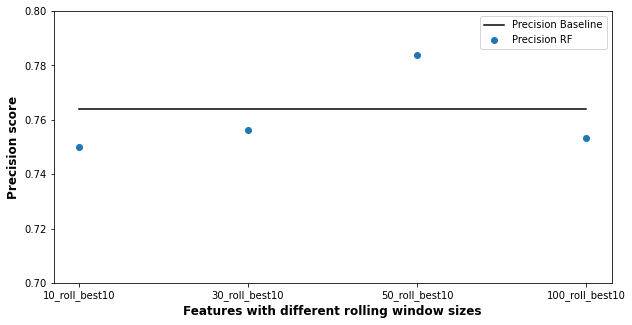

In [7]:
# ___Cell no. 6___

print("Now let us compare the Precision scores")
plt.figure(figsize=(10, 5))

mystring = "roll_"
    
# We make the second curve dashed so that it doesn't cover up the first
plt.scatter([ str(s) + "_roll_best10" for s in [10, 30, 50, 100] ], prec_list, label = "Precision RF")
plt.plot([ str(s) + "_roll_best10" for s in [10, 30, 50, 100] ], [0.764]*len(prec_list), label = "Precision Baseline", color = "black")



# plt.title("GS apples", fontweight ='bold', fontsize =12)    
plt.xlabel("Features with different rolling window sizes", fontweight ='bold', fontsize =12)
plt.ylabel("Precision score", fontweight ='bold', fontsize =12)
plt.ylim([.7,.8])

plt.legend()

plt.show()

From the above graph, we notice the following: 
   - The precision highest score is at `50_roll`
   - the baseline is outperforming 3 feature sets out of 4
   - the precision score at `50_roll` is slightly outperforming the baseline but does that even significant?
   - With only **ten features**, we can have a performance very close to the baseline that used the whole wavelength

---

Now for the hackathon tasks, on all three datasets, perform the following:
   - Instead of 10 features, try 5, 20, 40, ... to see if you can improve the performance
   - try other machine learning models such as XGB, SVM
   - Perform hyperparameter optimization on all methods, for more about machine learning optimization click [here](https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/)
   - In Tutorial 3, try other operations like the variance or skew instead of using the mean to aggregate between the columns.
   - Be creative, and enjoy.

 THE END